## 1: Import Necessary Libraries and Load Dataset

In [1]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load dataset
df = pd.read_csv('Telco-Customer-Churn.csv')

# Display top rows
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2: Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


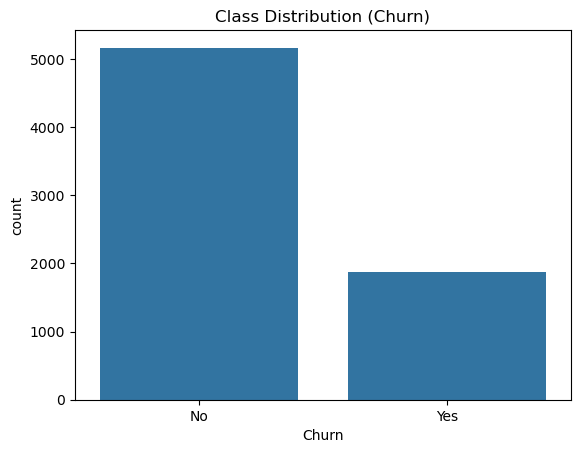

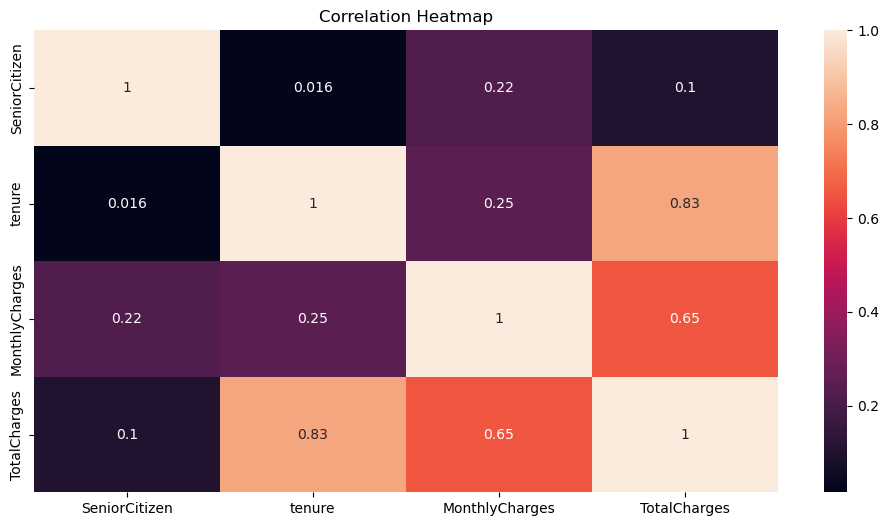

In [2]:
# Dataset structure
df.info()

# Check for missing values
df.isnull().sum()

# TotalCharges has 11 blank values - investigate
df[df['TotalCharges'].isnull()]

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing TotalCharges
df.dropna(subset=['TotalCharges'], inplace=True)

# Check for class balance
sns.countplot(data=df, x='Churn')
plt.title("Class Distribution (Churn)")
plt.show()

# Quick correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Correlation Heatmap")
plt.show()


## 3: Feature Engineering and Encoding

In [6]:
# Drop customerID
df.drop('customerID', axis=1, inplace=True)

# Binary features: Label Encoding
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 
               'PaperlessBilling', 'Churn']

le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# Multicategory columns: One-Hot Encoding
multi_cat_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 
                  'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                  'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

df = pd.get_dummies(df, columns=multi_cat_cols)

# Feature Scaling (tenure, MonthlyCharges, TotalCharges)
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']


## 4: Train-Test Split and Validation Set

In [7]:
# Train-test split (80/20 with validation in training set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Further split training set to get validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)


## 5: Build and Train ANN with Dropout Regularization

In [8]:
# Define model. Here I used Dropout randomly drop 30% of Neurons from the previous layer because the model overfit on simple dense network
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val), 
                    epochs=50, batch_size=64, verbose=1)


Epoch 1/50


C:\Users\jerome\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6479 - loss: 0.6191 - val_accuracy: 0.7938 - val_loss: 0.4475
Epoch 2/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7956 - loss: 0.4428 - val_accuracy: 0.7893 - val_loss: 0.4360
Epoch 3/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7868 - loss: 0.4554 - val_accuracy: 0.7876 - val_loss: 0.4361
Epoch 4/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7974 - loss: 0.4397 - val_accuracy: 0.7849 - val_loss: 0.4332
Epoch 5/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8075 - loss: 0.4169 - val_accuracy: 0.7867 - val_loss: 0.4306
Epoch 6/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8052 - loss: 0.4202 - val_accuracy: 0.7840 - val_loss: 0.4304
Epoch 7/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8127 - loss: 0.4122 - val_accuracy: 0.7876 - val_loss: 0.4303
Epoch 8/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8056 - loss: 0.4208 - val_accuracy: 0.7876 - val_loss: 0.4304
Epo

## 6: Visualize Loss and Accuracy Curves

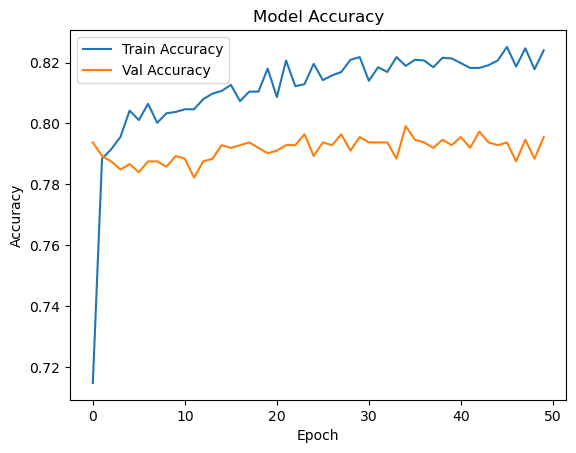

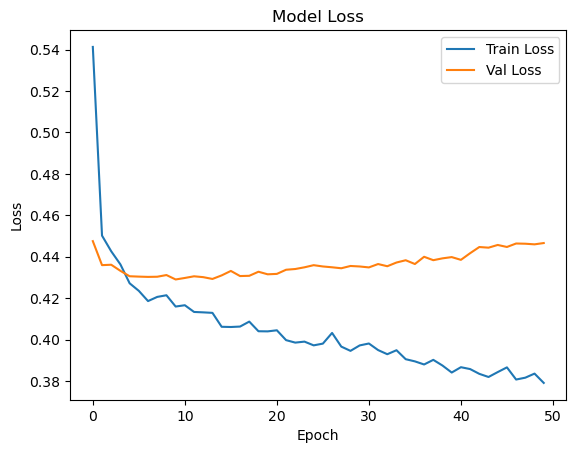

In [9]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## 7: Evaluate on Test Data

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


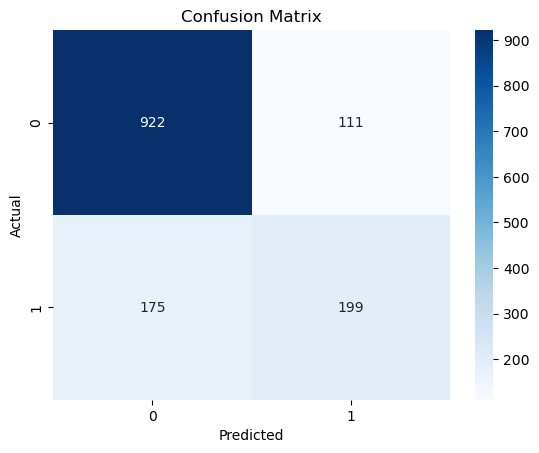

              precision    recall  f1-score   support

    No Churn       0.84      0.89      0.87      1033
       Churn       0.64      0.53      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [12]:
# Predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))


## 8: Conclusion

This project successfully developed an Artificial Neural Network (ANN) using TensorFlow and Keras to predict customer churn for a telecommunications company. The data was thoroughly preprocessed through exploratory data analysis, label and one-hot encoding, handling missing values, and scaling numerical features.

The final model included two hidden layers with dropout regularization to mitigate overfitting. Despite initial signs of overfitting during training, the model achieved a respectable 80% test accuracy. However, performance metrics showed a precision of 0.64 and recall of 0.53 for the 'Churn' class, indicating that the model struggled somewhat with identifying actual churners.

Nevertheless, the ANN effectively learned from patterns in customer attributes such as contract type, tenure, internet service, and billing method, which were key indicators of churn.

## 9: Recommendations

1. Improve Model Recall for Churners
Since retaining customers is usually more valuable than misclassifying non-churners, focus should be placed on increasing recall for the 'Churn' class. This can be achieved by:

    -Using class weighting in the loss function to penalize false negatives.
    
    -Exploring SMOTE or other resampling techniques to balance the training data.

2. Hyperparameter Tuning & Model Optimization

    -Consider grid/random search or using KerasTuner to fine-tune batch size, number of neurons, and learning rate.
    
    -Try alternate architectures (e.g., more layers, different activation functions).
    
    -Test advanced models like XGBoost or ensemble methods to benchmark performance.

3. Feature Importance and Business Action

    -Features like Contract type, Tech Support, Monthly Charges, and Tenure significantly influence churn.
    
    -Prioritize retention campaigns for customers:
    
    -On Month-to-month contracts
    
    -With short tenure
    
    -Without technical support or online backup

4. Deploy and Monitor Model

    -Integrate the model into the company's CRM system to flag at-risk customers.
    
    -Retrain periodically using fresh data to maintain performance.

5. Customer Retention Strategy

    -Introduce loyalty programs, discounts for long-term contracts, and proactive support services to reduce churn likelihood among high-risk segments.